In [1]:
from pathlib import Path
import pandas as pd

gap_df = pd.read_csv(Path('times_result_0.csv'))
grid_size_df = pd.read_csv(Path('times_result_1.csv'))
energy_df = pd.read_csv(Path('times_result_2.csv'))
voltage_df = pd.read_csv(Path('times_result_3.csv'))

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_times(data_df: pd.DataFrame, column_name: str, column_name_label: str, yscale: str = 'linear'):
    data = [
        data_df.loc[data_df['particle']=='proton']['cython_time'].tolist(),
        data_df.loc[data_df['particle']=='proton']['numba_time'].tolist(),
        data_df.loc[data_df['particle']=='proton']['numba_parallel_time'].tolist(),
    ]

    x_labels = data_df.loc[data_df['particle']=='proton'][column_name].tolist()
    X = np.arange(len(x_labels))
    fig = plt.figure()

    ax = fig.add_axes([0,0,1,1])

    ax.bar(X + 0.0, data[0], color = 'tab:orange', label='cython', width = 0.25, zorder=3)
    ax.bar(X + 0.25, data[1], color = 'tab:blue', label='numba single core', width = 0.25, zorder=3)
    ax.bar(X + 0.5, data[2], color = 'tab:purple', label='numba parallel', width = 0.25, zorder=3)

    plt.xticks([r + 0.25 for r in range(len(x_labels))], x_labels)

    plt.xlabel(column_name_label, fontweight ='bold', fontsize = 15)
    plt.ylabel('Execution Time [s]', fontweight ='bold', fontsize = 15)

    plt.grid(axis='y', color='0.95', zorder=0)

    plt.legend()

    plt.yscale(yscale)

    plt.show()

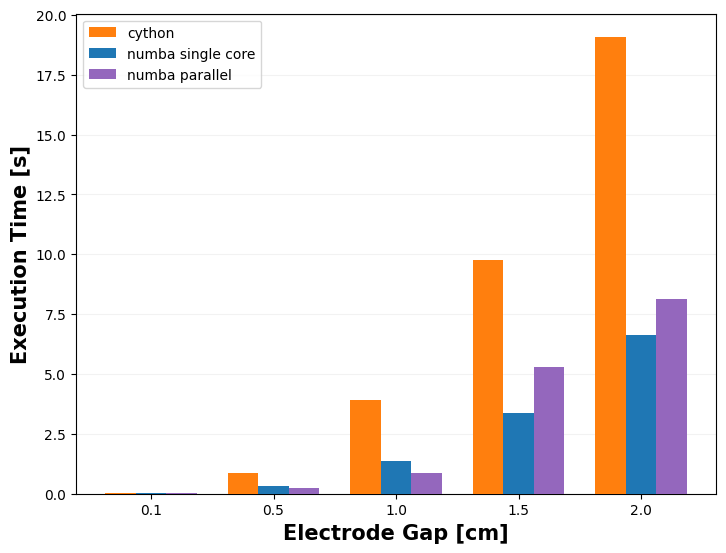

In [3]:
plot_times(gap_df, 'electrode_gap_cm', 'Electrode Gap [cm]')

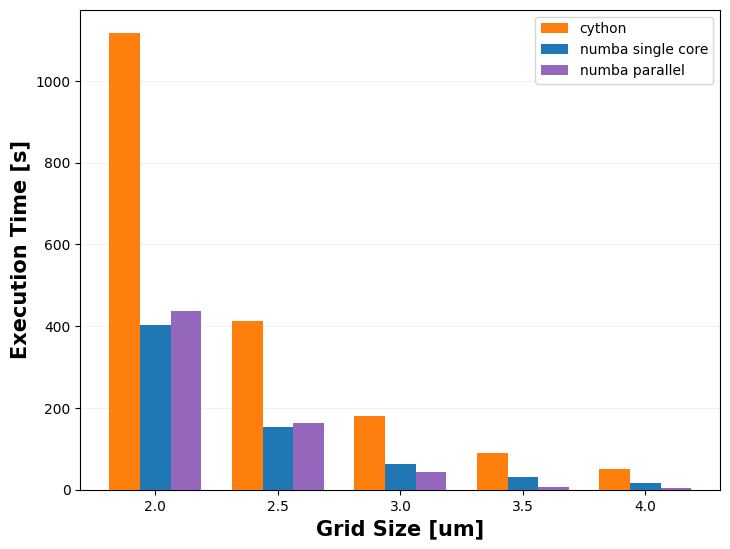

In [4]:
plot_times(grid_size_df, 'grid_size_um', 'Grid Size [um]')

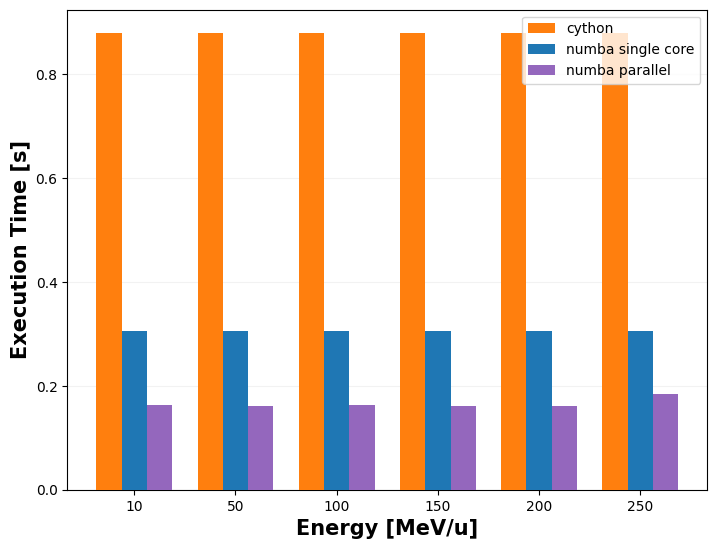

In [5]:
plot_times(energy_df, 'E_MeV_u', 'Energy [MeV/u]')

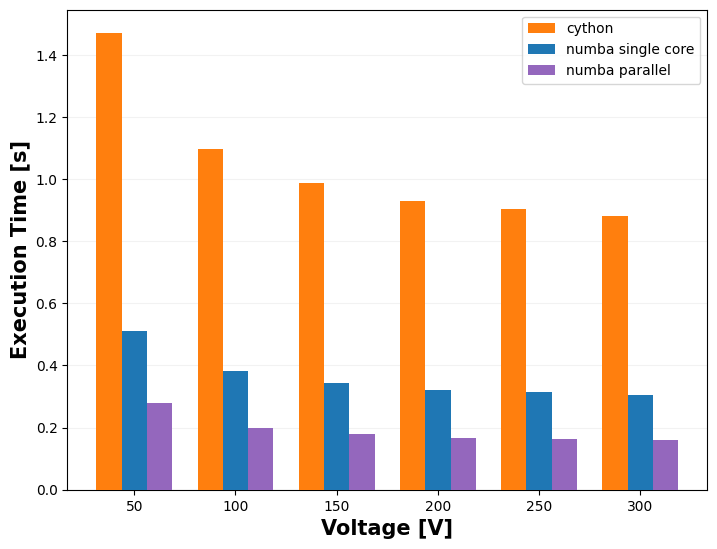

In [6]:
plot_times(voltage_df, 'voltage_V', 'Voltage [V]')

In [7]:
combined_df = pd.concat([gap_df, grid_size_df, energy_df, voltage_df])

combined_df

,Unnamed: 0,E_MeV_u,voltage_V,electrode_gap_cm,particle,grid_size_um,numba_parallel_time,numba_time,cython_time
0,0,250,300,0.1,proton,10.0,0.012378,0.013449,0.035368
1,1,250,300,0.5,proton,10.0,0.233058,0.305448,0.880478
2,2,250,300,1.0,proton,10.0,0.864676,1.355035,3.904035
3,3,250,300,1.5,proton,10.0,5.278747,3.381052,9.747164
4,4,250,300,2.0,proton,10.0,8.128516,6.629515,19.091478
0,0,250,300,0.5,proton,2.0,437.939377,403.682301,1117.775306
1,1,250,300,0.5,proton,2.5,162.405034,154.443905,412.150912
2,2,250,300,0.5,proton,3.0,43.374619,64.042103,180.727412
3,3,250,300,0.5,proton,3.5,6.560315,31.125785,88.952417
4,4,250,300,0.5,proton,4.0,4.301532,17.472970,50.302202


In [8]:
speedups = combined_df.apply(lambda row: row['cython_time']/row['numba_parallel_time'], axis=1)

speedups.max(), speedups.min(), speedups.mean()

(13.559167867575894, 1.8464920820594897, 5.210009826272289)

In [9]:
slow_runs = combined_df.loc[combined_df['cython_time']>60]
slow_runs

,Unnamed: 0,E_MeV_u,voltage_V,electrode_gap_cm,particle,grid_size_um,numba_parallel_time,numba_time,cython_time
0,0,250,300,0.5,proton,2.0,437.939377,403.682301,1117.775306
1,1,250,300,0.5,proton,2.5,162.405034,154.443905,412.150912
2,2,250,300,0.5,proton,3.0,43.374619,64.042103,180.727412
3,3,250,300,0.5,proton,3.5,6.560315,31.125785,88.952417


In [10]:
speedups_for_slow = slow_runs.apply(lambda row: row['cython_time']/row['numba_parallel_time'], axis=1)
speedups_for_slow.max(), speedups_for_slow.min(), speedups_for_slow.mean()

(13.559167867575894, 2.5377964122351555, 5.703994678716387)